In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

**Ejercicios para practicar con regresiones..**

* Limpieza e interpretación de los datos.
* Preprocesados.
* Creación de modelos de regresión (árboles de regresión, random forest, redes neuronales, otros modelos...).
* Utilización de las métricas para interpretar los resultados.
* Estudio y modificación de parámetros.

# Ejercicio 1
Crea al menos dos modelos de regresión diferentes para intentar predecir el mejor posible precio de las viviendas (MEDV) del archivo adjunto.

# Solución

In [2]:
df=pd.read_csv('housing data.csv', header=None,names=[ 'CRIM', 'ZN', 'INDUS',
                                                      'CHAS', 'NOX', 'RM', 'AGE',
                                                      'DIS', 'RAD', 'TAX', 'PTRATIO',
                                                      'B', 'LSTAT', 'MEDV'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


|Variable|Descripción|
|--------|-----------|
|CRIM | tasa de criminalidad per cápita por ciudad|
|ZN | proporción de terreno residencial zonificado para lotes de más de 25.000 pies cuadrados|
|INDUS | proporción de acres comerciales no minoristas por ciudad|
|CHAS | variable ficticia del río Charles (1 si el tramo limita con el río; 0 en caso contrario)|
|NOX | concentración de óxidos nítricos (partes por 10 millones)|
|RM | número promedio de habitaciones por vivienda|
|AGE | proporción de unidades ocupadas por propietarios construidas antes de 1940|
|DIS | distancias ponderadas a cinco centros de empleo de Boston|
|RAD | índice de accesibilidad a las carreteras radiales|
|TAX | tasa del impuesto sobre bienes inmuebles de valor íntegro por 10.000 dólares|
|PTRATIO | ratio alumno-profesor por localidad|
|B | $1000(Bk - 0.63)^2$ donde Bk es la proporción de negros por ciudad|
|LSTAT | porcentaje de la población de menor estatus|
|MEDV | valor medio de las viviendas ocupadas por sus propietarios en miles de dólares|

## 1.1 EDA

1. Verificar si existen valores nulos.

In [3]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

2. Mostrar descripción estadística de las variables.

In [4]:
df.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


3. Observar los tipos de datos de cada columna.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


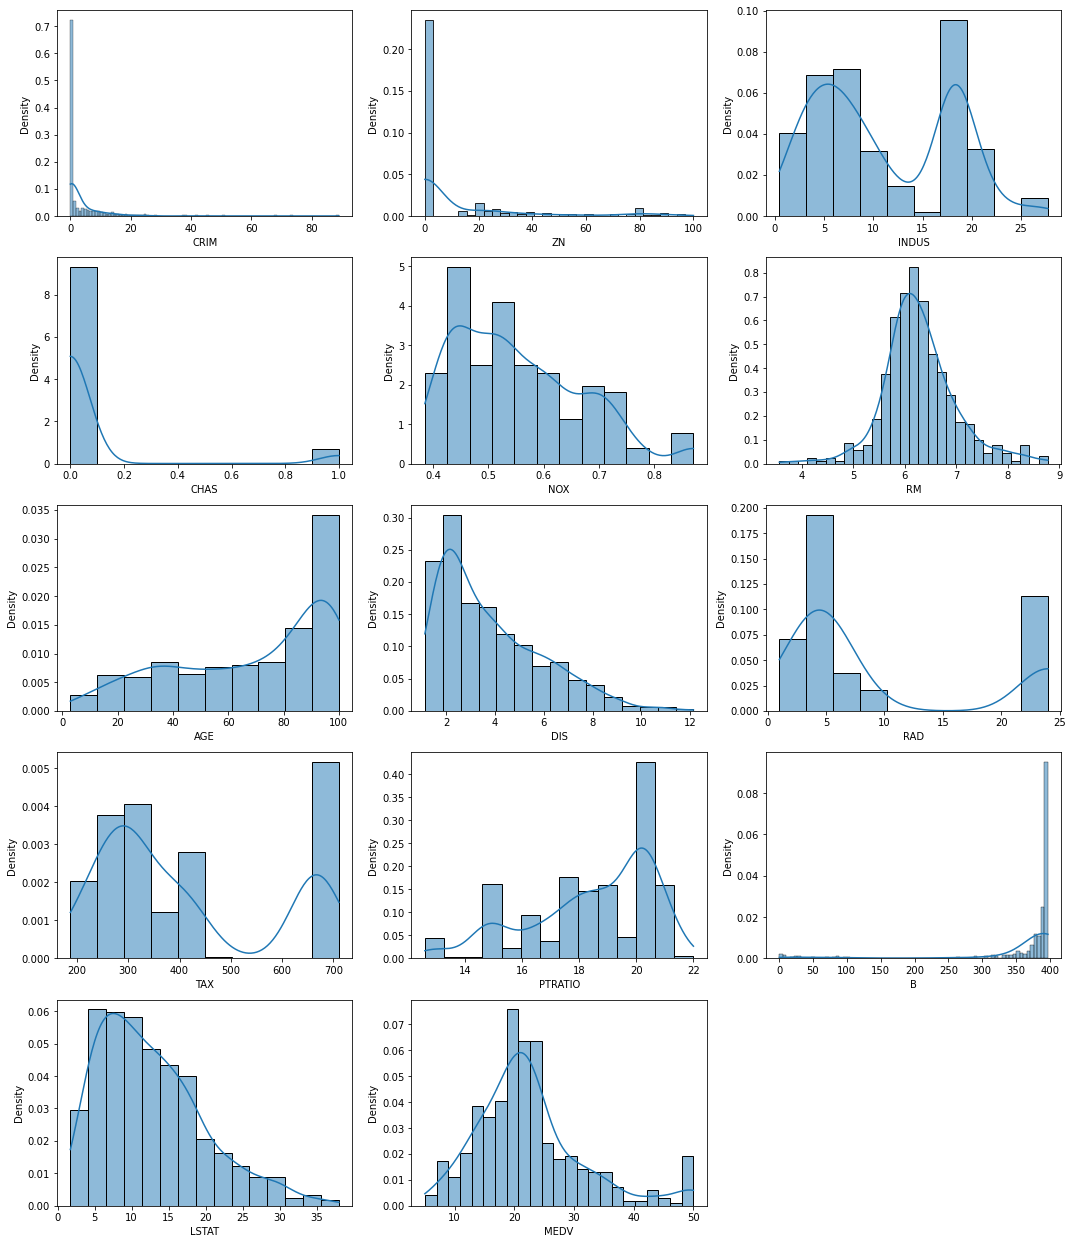

In [3]:
f=plt.figure(figsize=(18,22))
for i , col in zip(range(1,15),df.columns):
    fplot=f.add_subplot(5,3,i)
    sns.histplot(data=df, x=col, kde=True,stat='density');

Aunque todas las variables son valores numéricos, se puede ver la distribución de datos y algunas también son categóricas(**CHAS** y **RAD**).

4. Correlación entre todas y cada una de las variables.

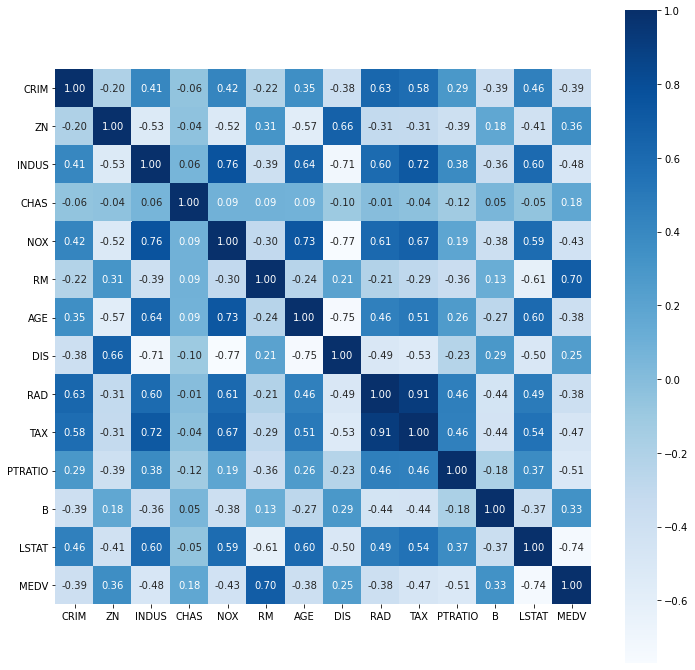

In [3]:
corr=df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, cmap='Blues',annot_kws={'size':10},fmt='.2f',square=True);

Los valores van de -1 a 1, si un valor se apróxima a 1 tendrá una correlación positiva(fuerte)  y si se apróxima a -1, tendra una correlación negativa(débil). Ahora, al examinar la columna MEDV, es mucho más fácil encontrar el cuadrado más oscuro RM y el más claro LSTAT. Habrá observado que, técnicamente, el cuadrado MEDV es el más oscuro. Esto tiene que ser así porque el MEDV está perfectamente correlacionado consigo mismo. Lo mismo ocurre con cada columna a lo largo de la diagonal.

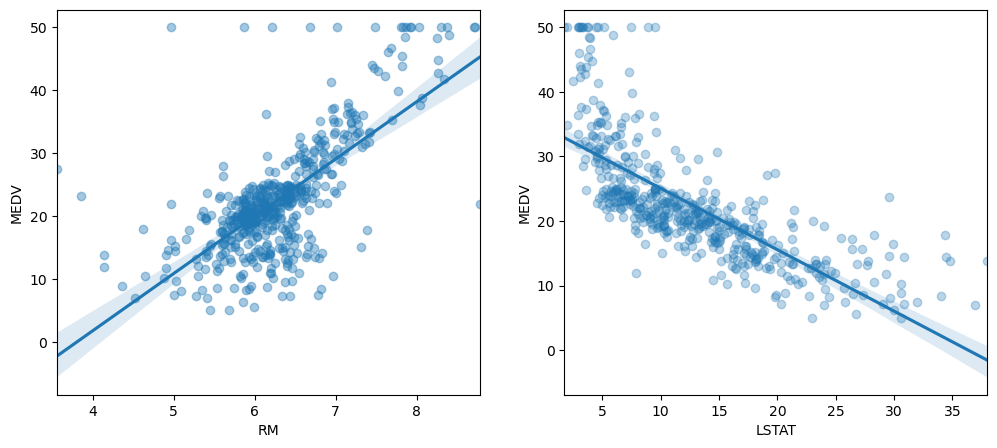

In [107]:
f=plt.figure(figsize=(12,5))
f1=f.add_subplot(1,2,1)
sns.regplot(x='RM',y='MEDV',data=df,scatter_kws={'alpha': 0.4})
f2=f.add_subplot(1,2,2)
sns.regplot(x='LSTAT',y='MEDV', data=df,scatter_kws={'alpha': 0.3});

A medida que la vivienda tiene más habitaciones (**RM**) su precio sube(gráfico de la izquierda). Por otro lado, si el porcentaje de la poblacón con menos estatus es alto el precio de la vivienda baja(gráfico de la derecha).

Visualización de la correlación de las variables con la columna de predicción **MEDV**.

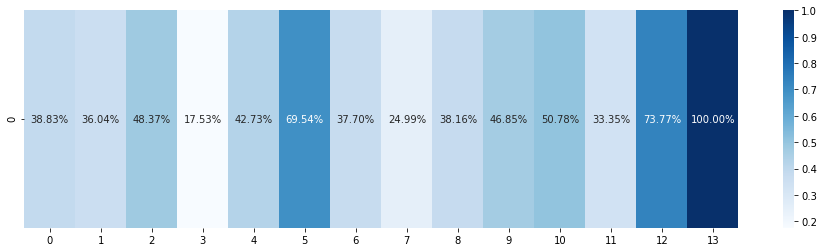

In [24]:
corr_df_medv=df.corrwith(df['MEDV'])
plt.figure(figsize = (16, 4))
sns.heatmap([np.abs(corr_df_medv)],cmap='Blues',annot=True,fmt='.2%');

In [25]:
#index_rk=corr_df_medv[:-1].abs().sort_values(ascending=False)*100
#index_rk

LSTAT      73.766273
RM         69.535995
PTRATIO    50.778669
INDUS      48.372516
TAX        46.853593
NOX        42.732077
CRIM       38.830461
RAD        38.162623
AGE        37.695457
ZN         36.044534
B          33.346082
DIS        24.992873
CHAS       17.526018
dtype: float64

## 1.2 Construcción de modelos de Regresión

1. La variable objetivo será la columna **MEDV**. Por lo tanto, la extraemos de la siguiente manera:

In [3]:
y=df.iloc[:, -1]
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

2. Escogemos la columnas para realizar las predicciones:

In [25]:
#index_rk.index

In [26]:
#X=df[index_rk.index]
#X.head()

In [4]:
X=df.iloc[:,:-1]
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


3. Crear un funcción para evaluar nuestros modelos.

In [63]:
# X: Coonjunto que será dividido en conjunto de prueba y entrenamiento
# y: Conjunto objetivo
# model: tipo de modelo (LinnearRegression, Lasso, RandomForest, etc...)
# trainSize: tamaño de datos de entrenamiento (0.6, 0.7, 0.8)  
# testSize: tamaño de datos de prueba (0.4, 0.3, 0.2)
# trainSize + testSize, debe ser igual a 1.
def reg_model(model,X,y,trainSize,testSize):
    # Crear conjuntos entrenamiento y prueba
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,train_size=trainSize,test_size=testSize, random_state=40)
    # Crear el modelo
    reg=model
    # Ajustar el modelo a los conjuntos de entrenamiento
    reg.fit(Xtrain,ytrain)
    # Predecir a partir de los datos de prueba
    ypred=reg.predict(Xtest)    
    return ytest, ypred

### 1.2.1  Regresión Lineal Multiple

In [64]:
ytest,ypred=reg_model(LinearRegression(),X,y,0.8,0.2)

In [65]:
df_compareLR = pd.DataFrame({"y-test":ytest,"y-predict":ypred.round(2)})
df_compareLR.reset_index(drop=True,inplace=True)
df_compareLR


,y-test,y-predict
0,22.7,21.71
1,30.3,32.68
2,14.4,8.74
3,13.4,17.20
4,20.1,17.67
...,...,...
97,28.7,27.78
98,20.3,23.17
99,24.5,20.39
100,29.8,25.06


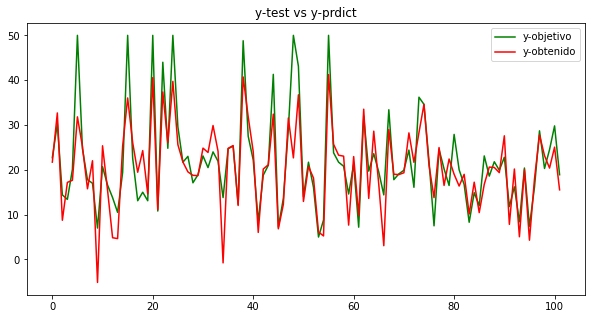

In [66]:
plt.subplots(figsize=(10,5))
x_points =list(range(len(ytest)))
plt.plot(x_points,ytest,label='y-objetivo',color='g')
plt.plot(x_points,ypred,label='y-obtenido',color='r')
plt.title('y-test vs y-prdict')
plt.legend()
plt.show()

Podemos ver que los valores obtenidos(**y-predict**) se aproximan razonablemente a los valores objetivos(**y-test**), ya que las dos gráficas se solapan un poco. 

### 1.2.2 Regresión Lasso

In [67]:
ytest_lasso, ypred_lasso = reg_model(Lasso(),X,y,0.8,0.2) 

In [68]:
df_compareLa = pd.DataFrame({"y-test":ytest_lasso,"y-predict":ypred_lasso.round(2)})
df_compareLa.reset_index(drop=True,inplace=True)
df_compareLa

,y-test,y-predict
0,22.7,21.76
1,30.3,30.38
2,14.4,7.85
3,13.4,15.95
4,20.1,18.01
...,...,...
97,28.7,27.39
98,20.3,24.62
99,24.5,20.55
100,29.8,22.39


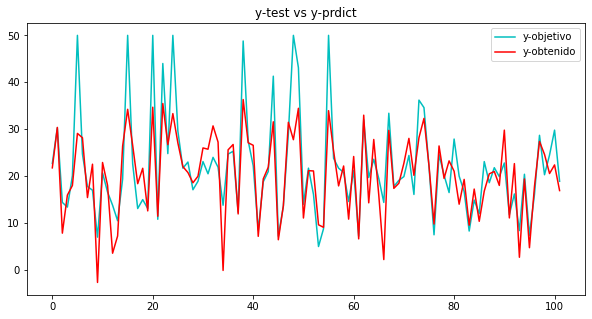

In [69]:
plt.subplots(figsize=(10,5))
x_points =list(range(len(ytest)))
plt.plot(x_points,ytest_lasso,label='y-objetivo',color='c')
plt.plot(x_points,ypred_lasso,label='y-obtenido',color='r')
plt.title('y-test vs y-prdict')
plt.legend()
plt.show()

### 1.2.2 Regresión Ridge

In [70]:
ytest_ridge, ypred_ridge = reg_model(Ridge(),X,y,0.8,0.2) 
df_compareRi = pd.DataFrame({"y-test":ytest_ridge,"y-predict":ypred_ridge.round(2)})
df_compareRi.reset_index(drop=True,inplace=True)
df_compareRi

,y-test,y-predict
0,22.7,22.43
1,30.3,32.32
2,14.4,8.14
3,13.4,17.38
4,20.1,17.38
...,...,...
97,28.7,27.56
98,20.3,23.17
99,24.5,20.80
100,29.8,24.94


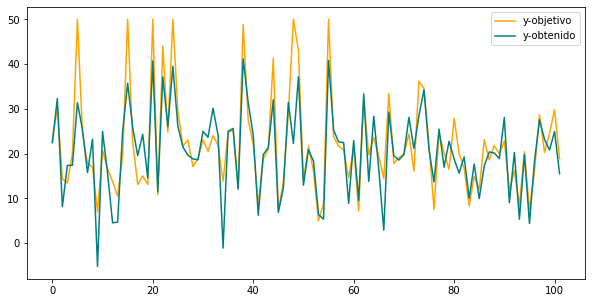

In [71]:
plt.subplots(figsize=(10,5))
x_points =list(range(len(ytest)))
plt.plot(x_points,ytest_ridge,label='y-objetivo',color='orange')
plt.plot(x_points,ypred_ridge,label='y-obtenido', color='teal')
plt.legend()
plt.show()

# Ejercicio 2
Compáralos en base al MSE y al R2.

# Solución

Tomando la media de los errores al cuadrado obtenemos el Error Cuadrático Medio (MSE), y puede expresarse de la siguiente manera:

$$MSE=\frac{1}{n}\sum_{i=1}^{n}(y_{i}-\widehat{y}_{i})^2.$$

Donde, $y_{i}$ y $\widehat{y}_{i}$ son los valores reales y predichos, respectivamente, para el $i$-ésimo punto de datos.

Una métrica que se utiliza habitualmente es la puntuación $R^2$, o la puntuación $R$-cuadrado, que puede expresarse del siguiente modo:

$$R^{2}=1-\sum_{i=1}^{n}\frac{(y_{i}-\widehat{y}_{i})^2}{(y_{i}-\bar{y})^2}$$

In [72]:
def mse_r2(y_test,y_pred):
    print('MSE: ',mean_squared_error(y_test, y_pred))
    print('R2: ',r2_score(y_test,y_pred))    

### 2.1 Regresión lineal   

In [73]:
mse_r2(ytest,ypred)

MSE:  33.919964975183156
R2:  0.7009532387355608


### 2.1 Regresión Lasso

In [74]:
mse_r2(ytest_lasso,ypred_lasso)

MSE:  39.35329480677696
R2:  0.6530516654229601


### 2.1 Regresión Ridge

In [75]:
mse_r2(ytest_ridge,ypred_ridge)

MSE:  34.39910393090854
R2:  0.6967290317527373


$R^2$ = 1 significa que tenemos una predicción perfecta. En otras palabras, la varianza de los datos será explicada en su totalidad por el modelo. En caso de la **Regresión lineal** tenemos un 70% de la varianza explicada, es decir, de los tres modelos **Regresión lineal** es el mejor. Por lo tanto, los valores ajustados están más cerca de los valores observados.

# Ejercicio 3
Entrénalos utilizando los diferentes parámetros que admiten para intentar mejorar la predicción.

# Solución

Cambiaremos los diferentes parámetros de nuestros modelos para ver si mejoran en la predicción. Para este propósito utillizaremos el modelo **RandomForestRegresso()** y  el método **get_paramas()** para obtener información de los diferentes parámetros que admite nuestro modelo. Por último, iremos modificando estos parámetros para que nuestro modelo pueda mejorar su predicción.

1. Obtener parámetros de modelo **RandomForestRegresso()**:

In [17]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

2. Vamos a evaluar nuestro modelo con los parámetros **max_depth**(representa La profundidad máxima del árbol) y **min_impurity_split** (número mínimo de muestras necesarias para dividir un nodo interno). Esta elección es arbitraria pues pudimos elegir otros parámetros, incluso más los que escogimos anteriormente.

In [93]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,train_size=.8,test_size=.2, random_state=40)

maxDepth = [1, 2, 3, 4, 5]
minSamSplit = [2, 4, 6, 8]

list1,list2,list3 = [],[],[]

for i in maxDepth:
    for j in minSamSplit:
        rf_regressor = RandomForestRegressor(max_depth=i,
                                             min_samples_split=j)
        rf_regressor.fit(Xtrain,ytrain)
        ypredict=rf_regressor.predict(Xtest)
        list1.append(i)
        list2.append(j)            
        list3.append(r2_score(ytest,ypredict))          

3. Creamos un dataframe cuyas columnas serán los direntes parámetros, además, una columna adicional con las puntuaciones de los parámetros escogidos. 

In [94]:
df_regressor=pd.DataFrame({'max_depth':list1,
                           'min_samples_split':list2,
                           'score':list3})
df_regressor.head()

,max_depth,min_samples_split,score
0,1,2,0.493905
1,1,4,0.500332
2,1,6,0.514572
3,1,8,0.498270
4,2,2,0.704730


4. Elegimos la fila con la mayor puntuación:

In [95]:
df_regressor[df_regressor['score']==df_regressor['score'].max()]

,max_depth,min_samples_split,score
16,5,2,0.852681


5. Evaluamos el modelo con los parámetros obtenidos en el paso 4.

In [96]:
ytest_rf_eval,ypred_rf_eval=reg_model(RandomForestRegressor(min_samples_split=2,
                                                            max_depth=5),
                                      X,y,0.8,0.2)

6. Gráficar los valores **objetivos** y **obtenidos**

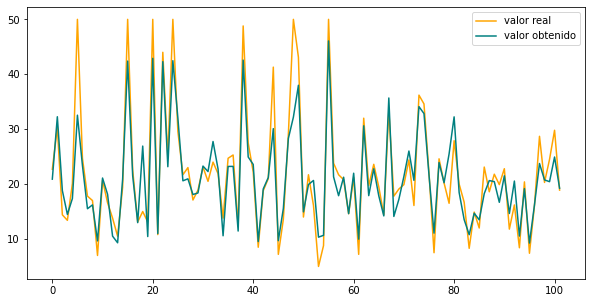

In [97]:
plt.subplots(figsize=(10,5))
x_points =list(range(len(ytest)))
plt.plot(x_points,ytest_rf_eval,label='valor real',color='orange')
plt.plot(x_points,ypred_rf_eval,label='valor obtenido', color='teal')
plt.legend()
plt.show()

7. Obtener puntuaciones con **MSE** y **R2**.

In [98]:
mse_r2(ytest_rf_eval,ypred_rf_eval)

MSE:  16.76956796199726
R2:  0.8521553606995698


Podemos ver que hemos alcanzado un 85% de efectividad al entrenar nuestro modelo. La pregunta es: ¿Qué pasa si escogemos otros parámetros? o ¿si escojemos más?. Esto es muy difícil de saberlo, incluso combinando muchos parámetros llevaria mucho tiempo y a veces costo computacional.

#### Conclusion
* Es difícil adivinar un buen valor de hiperparámetro, incluso para alguien que entienda realmente cómo funcionan los modelos.

* Realizar una búsqueda manual por sí solo lleva mucho tiempo.  

# Ejercicio 4
Compare su rendimiento empleando la aproximación train/test o empleando todos los datos (validación interna).

# Solución

Ahora que ya sabemos cómo funciona la búsqueda manual, vamos a aprender la estrategia automatizada de ajuste de hiperparámetros más sencilla.

### Creación de un modelo óptimo de regresión aleatoria

La clase **RandomForestRegressor** del módulo sklearn.ensemble permite entrenar modelos random forest para problemas de regresión. Utilizaremos **RandomizedSearchCV** para buscar una mejor combinación de hiperparámetros de **RandomForestRegressor** que los predeterminados.

1. Utillice el método **get_paramas()** para obtener información de los diferentes parámetros que admite nuestro modelo.

In [52]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

2. Configure la rejilla de hiperparámetros utilizando **max_depth**, **min_samples_split**,... como se muestra en el siguiente fragmento de código:

In [110]:
params = {'max_depth': [None, 1, 2, 3, 4, 5, 6, 8,10, 15, 20],
          'min_samples_split': [2, 3, 4, 5, 6],
          'min_samples_leaf': [1, 2, 3, 4, 6, 8],
          'max_features': [1.0, 0.9, 0.8, 0.7, 0.6,0.5, 0.4]}

3. Inicialice el modelo **RandomForestRegressor()**.

In [111]:
rf_regressor = RandomForestRegressor(n_jobs=-1, random_state=0)

4. Defina el objeto **GridSearchCV** como **rf_regressor_tuned**, pasaremos como parámetros el modelo  **RandomForestRegressor()**, los **params** definidos en **(2)**, cross-validation de 5 y como puntuación **neg_mean_squared_error**.

In [126]:
rf_regressor_tuned = RandomizedSearchCV(rf_regressor, params, 
                                        cv=5,
                                        scoring='neg_mean_squared_error',
                                        random_state=0)

5. Ajuste **rf_regressor_tuned** a los datos:

In [127]:
rf_regressor_tuned.fit(X, y)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=0),
                   param_distributions={'max_depth': [None, 1, 2, 3, 4, 5, 6, 8,
                                                      10, 15, 20],
                                        'max_features': [1.0, 0.9, 0.8, 0.7,
                                                         0.6, 0.5, 0.4],
                                        'min_samples_leaf': [1, 2, 3, 4, 6, 8],
                                        'min_samples_split': [2, 3, 4, 5, 6]},
                   random_state=0, scoring='neg_mean_squared_error')

6. Ahora, imprima los parámetros ajustados con la mejor puntuación, para obtener la mejor puntuación utlizamos el método **.best_score_** de **GridSearchCV**.

In [128]:
p = rf_regressor_tuned.best_params_
print("Mejores parámetros: {}".format(p))
score = rf_regressor_tuned.best_score_
rsm = np.sqrt(-score)
print("Mejor puntuación: {}".format(rsm))

Mejores parámetros: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 0.4, 'max_depth': 8}
Mejor puntuación: 4.399682197436758


7. Evalúe el modelo con los parámetros obtenidos en **6**:

In [130]:
ytest_tuned,ypred_tuned=reg_model(rf_regressor_tuned.best_estimator_ , X,y,0.8,0.2)

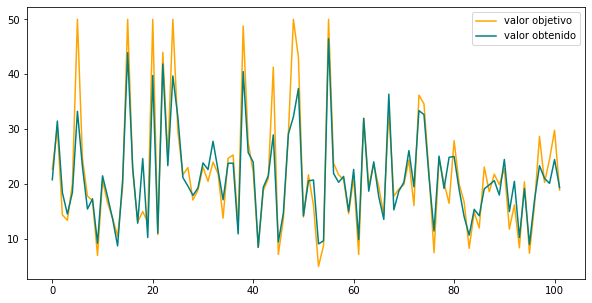

In [131]:
plt.subplots(figsize=(10,5))
x_points =list(range(len(ytest_tuned)))
plt.plot(x_points,ytest_tuned,label='valor objetivo',color='orange')
plt.plot(x_points,ypred_tuned,label='valor obtenido', color='teal')
plt.legend()
plt.show()

In [132]:
mse_r2(ytest_tuned,ypred_tuned)

MSE:  16.556226248295047
R2:  0.8540362337656808


# Ejercicio 5
No uses la variable del número de habitaciones (RM) en la hora de hacer predicciones.

# Solución

1. Creamos un nuevo conjunto **X1** eliminando las columna RM y MEDV de nuestro datset

In [139]:
X1=df.drop(['RM','MEDV'],axis=1) 
X1.head()

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,54.2,6.0622,3,222.0,18.7,396.90,5.33


2. Predicción con el modelo RandomForestRegressor() obtenido en **Ejercicio 4**.

In [140]:
ytest,ypred=reg_model(rf_regressor_tuned.best_estimator_,X1,y,0.8,0.2)

In [141]:
mse_r2(ytest,ypred)

MSE:  23.076126691774856
R2:  0.7965551864587123


### Conclusión
   * Podemos ver que hemos obtenido una puntuación $R^2\approx 84\%$ al eliminar la columna **RM** (número promedio de habitaciones por vivienda).
   * En comparación con la puntuación $R^2\approx 86\%$ obtenida en el **Ejercicio 4** hay una perdida del 2%.
   * Estos resultados se deben a que existe una correlación muy fuerte en **RM** y **MEV** y podemos eliminar uno de ellos, pero como queremos predecir los precios no quedamos con **MEV**.
   * Por lo tanto, podemos afirmar que predecir los precios con estos datos también son aceptables.